In [69]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score




In [70]:
df_train = pd.read_csv('heart_cleveland_upload.csv')
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [71]:
df_train.shape

(297, 14)

In [72]:
df_train.count()

age          297
sex          297
cp           297
trestbps     297
chol         297
fbs          297
restecg      297
thalach      297
exang        297
oldpeak      297
slope        297
ca           297
thal         297
condition    297
dtype: int64

In [73]:
df_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


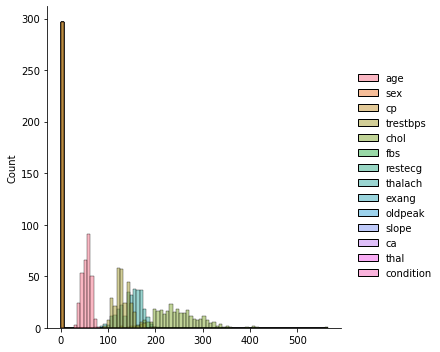

In [75]:
sns.displot(df_train)

In [76]:
df_train.isna().sum

<bound method DataFrame.sum of        age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
292  False  False  False     False  False  False    False    False  False   
293  False  False  False     False  False  False    False    False  False   
294  False  False  False     False  False  False    False    False  False   
295  False  False  False     False  False  False    False    False  False   
296  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  condition

In [77]:
X_train = df_train.drop('condition',axis=1)
y_train = df_train['condition']
print(y_train.head())
label_en = LabelEncoder()
y_train = label_en.fit_transform(y_train)
X_train.shape


0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64


(297, 13)

In [78]:
y_train.shape

(297,)

In [79]:

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size= 0.2,
                                                      shuffle= True, 
                                                      random_state=20)

In [80]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None) 
Y_test = to_categorical(y_test, num_classes=None)

In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                224       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
24/24 [==============================] - 1s 12ms/step - loss: 0.8294 - accuracy: 0.4810 - val_loss: 0.7195 - val_accuracy: 0.3667
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5907 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 3/50
24/24 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5485 - val_loss: 0.6727 - val_accuracy: 0.5500
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.5781 - val_loss: 0.7043 - val_accuracy: 0.4667
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.6245 - val_loss: 0.6242 - val_accuracy: 0.7000
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.5992 - val_loss: 0.6200 - val_accuracy: 0.6833
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6349 - accuracy: 0.6245 - val_loss: 0.6156 - val_accuracy: 0.6667
Epoch 8/50
24/24 [=

<AxesSubplot:ylabel='Count'>

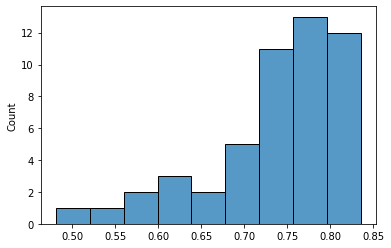

In [66]:
sns.histplot(history.history['accuracy'])

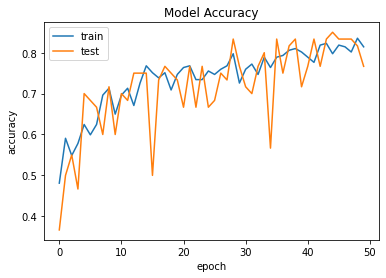

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

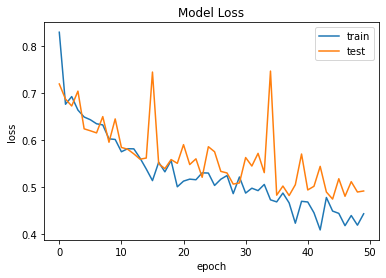

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()